In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.metrics import roc_curve, auc

#NaiveBayes
from sklearn.naive_bayes import GaussianNB

#extreme gradient boost
from xgboost import XGBClassifier

#Tensorflow
import tensorflow as tf
from tensorflow.keras import regularizers

In [ ]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
### sütunların targeti hangi yönde etkilediğini gösteriyoruz
data.corr()["target"].sort_values()

oldpeak    -0.438441
exang      -0.438029
ca         -0.382085
thal       -0.337838
sex        -0.279501
age        -0.229324
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
slope       0.345512
thalach     0.422895
cp          0.434854
target      1.000000
Name: target, dtype: float64

In [ ]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
for i in list(data.columns):
  print("{} --> {}".format(i,data[i].value_counts().shape[0]))

age --> 41
sex --> 2
cp --> 4
trestbps --> 49
chol --> 152
fbs --> 2
restecg --> 3
thalach --> 91
exang --> 2
oldpeak --> 40
slope --> 3
ca --> 5
thal --> 4
target --> 2


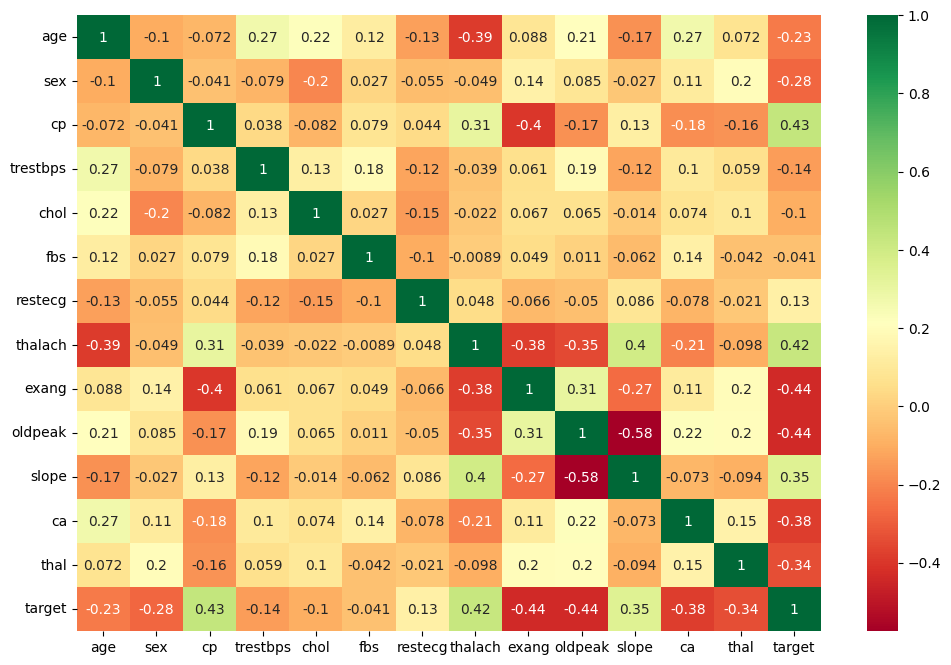

In [ ]:
import seaborn as sns
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(12,8))
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [ ]:
#ONE HOT ENCODER: kategorik olan sütunlar one-hot encoding ile dönüştürülüyor. Her bir kategorik değer, ayrı bir sütun haline getirilir ve bu sütunlar 0 veya 1 değerlerini alır.
#Bu, makine öğrenimi algoritmalarının kategorik verilerle çalışmasını kolaylaştırır.
dataset=pd.get_dummies(data,columns=["sex","cp","fbs","restecg","exang","slope","ca","thal"])

In [ ]:
# Normalizasyon sayısal özellikler (age, trestbps, chol, thalach, oldpeak) StandardScaler kullanılarak normalize edilir.
#Normalizasyon, özelliklerin aynı ölçeğe sahip olmasını sağlar, bu da birçok makine öğrenimi algoritması için önemlidir.
scaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale]=scaler.fit_transform(dataset[columns_to_scale])

In [ ]:
y=dataset['target']
x=dataset.drop(['target'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=5)

**LOGISTIC REGRESSION**

In [ ]:
logreg=LogisticRegression()

In [ ]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
ypred_prob=logreg.predict_proba(x_test)
ypred_prob

In [ ]:
logreg_predict = logreg.predict(x_test)
logreg_conf_matrix = confusion_matrix(y_test, logreg_predict)
logreg_acc_score = accuracy_score(y_test, logreg_predict)
print("confussion matrix")
print(logreg_conf_matrix,"\n")
print(classification_report(y_test,logreg_predict))

confussion matrix
[[138  28]
 [ 12 161]] 

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       166
           1       0.85      0.93      0.89       173

    accuracy                           0.88       339
   macro avg       0.89      0.88      0.88       339
weighted avg       0.89      0.88      0.88       339



In [ ]:
print("Accuracy of Logistic Regression:",logreg_acc_score*100,'\n')

Accuracy of Logistic Regression: 88.20058997050147 



In [ ]:
score=cross_val_score(logreg,x,y,cv=5)
score.mean()

0.8585365853658538

In [ ]:
ypred=np.argmax(ypred_prob,axis=1)
ypred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [ ]:
dummy=pd.DataFrame(ypred_prob)
dummy["ypred"]=ypred
dummy.head()

,0,1,ypred
0,0.065136,0.934864,1
1,0.502345,0.497655,0
2,0.707733,0.292267,0
3,0.978017,0.021983,0
4,0.267778,0.732222,1


**KNN**

In [ ]:
knn_scores=[]
for k in range(1,21):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  knn_scores.append(knn.score(x_test,y_test))


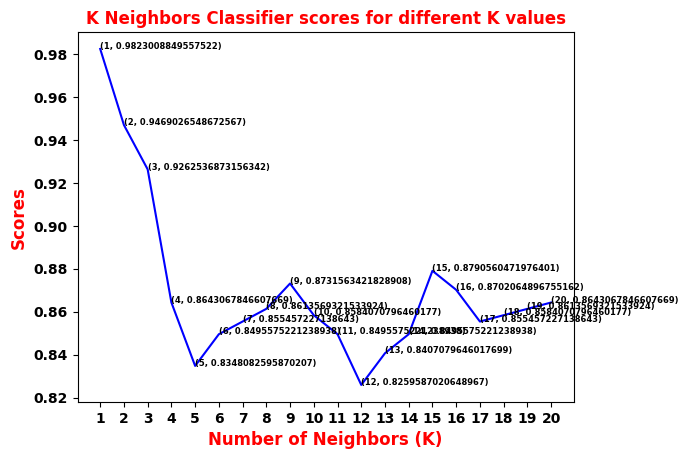

In [ ]:
plt.plot([k for k in range(1,21)],knn_scores,color='blue')
for i in range(1,21):
  plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]),fontsize='6')
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors (K)',color='Red',weight='bold',fontsize='12')
plt.ylabel('Scores',color='Red',weight='bold',fontsize='12')
plt.title('K Neighbors Classifier scores for different K values',color='Red',weight='bold',fontsize='12')
plt.show()
plt.rcParams["font.weight"]="bold"
plt.rcParams["axes.labelweight"]="bold"

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
score=cross_val_score(knn,x,y,cv=10)

In [ ]:
score.mean()

0.8770607272035027

RANDOM FOREST

In [ ]:
rfc = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=7)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=20, random_state=12)

In [ ]:
y_pred=rfc.predict(x_test)
y_pred_quant=rfc.predict_proba(x_test)[:,1]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       166
           1       0.95      0.99      0.97       173

    accuracy                           0.97       339
   macro avg       0.97      0.97      0.97       339
weighted avg       0.97      0.97      0.97       339



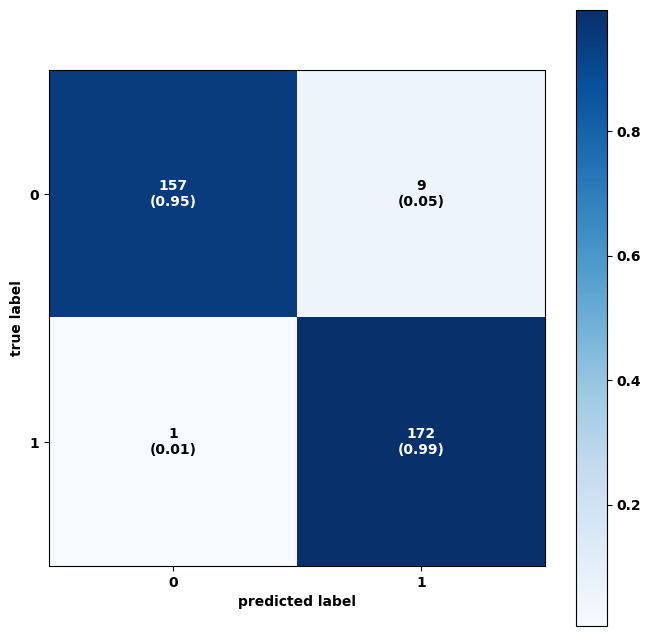

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cm=metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(8,8))

plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_true=y_test,y_pred=y_pred),"\n")

Accuracy: 0.9705014749262537 



In [ ]:
score=cross_val_score(rfc,x,y,cv=7)
score.mean()

0.9716841726906027

NAIVE BAYES

In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)
nbpred = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix,"\n")
print(classification_report(y_test,nbpred))

confussion matrix
[[129  37]
 [ 16 157]] 

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       166
           1       0.81      0.91      0.86       173

    accuracy                           0.84       339
   macro avg       0.85      0.84      0.84       339
weighted avg       0.85      0.84      0.84       339



In [ ]:
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')

Accuracy of Naive Bayes model: 84.36578171091446 



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_true=y_test,y_pred=y_pred),"\n")

Accuracy: 0.8436578171091446 



EXTREME GRADIENT BOOST

In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=75, max_depth=20,gamma=0.8, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(x_train, y_train)
xgb_predicted = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix,"\n")
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[133  33]
 [  8 165]] 

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       166
           1       0.83      0.95      0.89       173

    accuracy                           0.88       339
   macro avg       0.89      0.88      0.88       339
weighted avg       0.89      0.88      0.88       339



In [ ]:
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')

Accuracy of Extreme Gradient Boost: 87.90560471976401 



In [ ]:
score=cross_val_score(xgb,x,y,cv=7)
score.mean()

0.8965413954231399

ARTIFICAL NEURAL NETWORK-- TENSORFLOW

In [ ]:
tf_model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=x_train.shape[1], kernel_regularizer=regularizers.l2(0.008)),
    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.008)),
    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
tf_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
tf_model.fit(x=x_train,y=y_train, validation_data = (x_test,y_test),epochs=100, batch_size=32,verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 28ms/step - loss: 1.1213 - accuracy: 0.7726 - val_loss: 1.0186 - val_accuracy: 0.8171
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.9296 - accuracy: 0.8309 - val_loss: 0.8553 - val_accuracy: 0.8319
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8007 - accuracy: 0.8615 - val_loss: 0.7620 - val_accuracy: 0.8496
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7166 - accuracy: 0.8703 - val_loss: 0.6858 - val_accuracy: 0.8702
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6538 - accuracy: 0.8673 - val_loss: 0.6305 - val_accuracy: 0.8791
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6047 - accuracy: 0.8688 - val_loss: 0.5843 - val_accuracy: 0.8732
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5630 - accuracy: 0.8746 - val_loss: 0.5459 - val_accuracy: 0.8850
Epoch 8/100


In [ ]:
modelkaybi=pd.DataFrame(tf_model.history.history)

<Axes: >

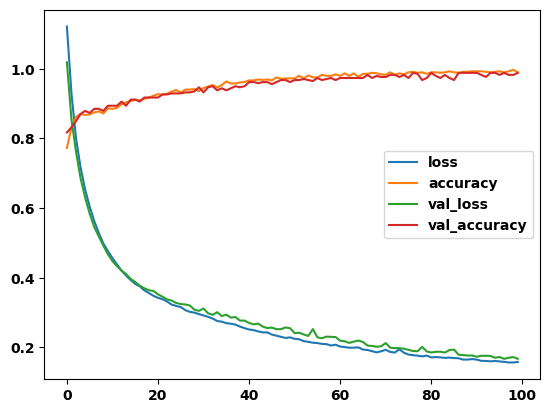

In [ ]:
modelkaybi.plot()